In [180]:
import pandas as pd
from pandas import *
import numpy as np
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

### Phase II 

### To evaluate the Environmental Pollutants PM2.5, CO, NO2, and O3 on the Incidence and Mortality of Covid 19 in DMV, the study use historical data obtained from Environmental Protection Agency and National Climate data Center. Data Visualization, Machine Learning, Prediction and Linear Regression model and correlation analysis of PM2.5, CO, NO2, and O3 data will be made to determine their impact on the Pandemic. 


## Evaluation of the Regression Analysis 

In [181]:
data = pd.read_csv('DMV10043.csv')
data

,Ozone_ Contn,NO2_Contn,CO_ Concn,Temp_ Avg,SO2 _Contn,PM2.5_Contn,deathIncrease
0,0.014,21.7,0.1,36,17.0,25.0,39
1,0.025,19.0,0.3,80,14.0,13.0,26
2,0.049,24.9,0.4,64,19.0,24.0,35
3,0.042,22.1,0.1,80,18.0,21.0,26
4,0.027,28.6,0.3,76,34.0,37.0,31
...,...,...,...,...,...,...,...
382,0.023,31.2,0.4,41,31.2,14.6,24
383,0.019,34.4,0.4,48,34.4,14.5,24
384,0.037,54.0,0.3,76,54.0,47.0,62
385,0.015,23.0,1.3,37,23.0,16.9,29


In [182]:
data =data.reindex(columns=[' NO2_Contn','CO_ Concn','Temp_ Avg ', 'SO2 _Contn', ' PM2.5_Contn',
       'deathIncrease'])
# features and the target (Death Increath Due to Covid) after tarined test split. 

In [183]:
data.shape

(387, 6)

C:\Users\Tamrat\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


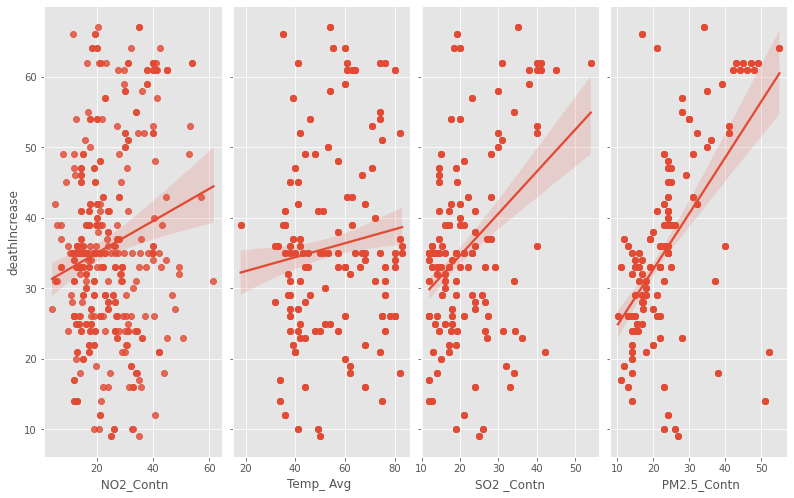

In [184]:
sns.pairplot(data,x_vars=[' NO2_Contn','Temp_ Avg ', 'SO2 _Contn', ' PM2.5_Contn'],y_vars ='deathIncrease',size=7,aspect=0.4,kind='reg')

In [185]:
feature_col =['NO2_Contn','Temp_ Avg ', 'SO2 _Contn', ' PM2.5_Contn']

In [186]:
train,test=train_test_split(data,test_size=0.2,random_state=42)

In [187]:
len(train)

309

In [188]:
len(test)

78

In [189]:
y=data['deathIncrease']

In [190]:
# The target variable 
y 

0      39
1      26
2      35
3      26
4      31
       ..
382    24
383    24
384    62
385    29
386    28
Name: deathIncrease, Length: 387, dtype: int64

In [2]:
x=data[[' NO2_Contn','Temp_ Avg ', 'SO2 _Contn', ' PM2.5_Contn']] 

NameError: name 'data' is not defined

In [3]:
# The predictor variables
x

NameError: name 'x' is not defined

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.50,random_state=42)

NameError: name 'train_test_split' is not defined

In [194]:
reg =LinearRegression( )
reg.fit(data[['Temp_ Avg ','SO2 _Contn', ' PM2.5_Contn']],data.deathIncrease)

LinearRegression()

In [195]:
y_pred = reg.fit(x_train,y_train)
y_pred

LinearRegression()

In [1]:
#  Testing the trainined

y_pred =reg.predict(x_test)
pred = [p[0] for p in pred]

NameError: name 'reg' is not defined

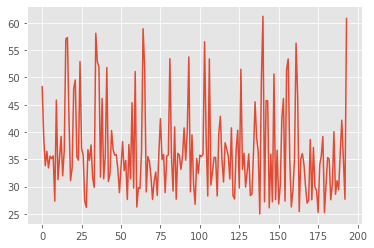

In [197]:
# visualizing the prediction 
plt.plot(y_pred)


### MSE ,R Square, Adjusted R Square, RMSE, MAE

### Coeffcient    - Used to determine  how much the dependent variable is expected to increase

In [198]:

reg.coef_ 

array([-0.03197344, -0.0227597 ,  0.12314261,  0.80340807])

In [199]:
reg.intercept_

16.102607432854075

### MSE - to determine  how close a regression line is to a set of points

In [200]:
from sklearn.metrics import mean_squared_error 

In [201]:
mean_squared_error(y_test,y_pred)

154.31875470630382

In [202]:
mean_squared_error(y_test,y_pred,squared=False)

12.422510000249702

### R Square  to determine is a goodness-of-fit measure for linear regression models and identify   how much variation of a dependent variable is explained by the independent  variable(s) in a regression model.

In [203]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.23523749658777227

In [204]:
# Adjusted R Square

# Adjusted R2 = 1 – [ (1-R2)* (n-1)/ (n-k-1)] 
# Because R2 always increases as you add more predictors to a model, 
# adjusted R2 can serve as a metric that tells you how useful
# a model is, adjusted for the number of predictors in a model.

In [205]:

r2 = r2_score(y_test,y_pred)

n= len(y_test)
k= len(x_test.columns)

adj_r2= 1-(((1-r2)*(r2-1))/(n-k-1)) 
adj_r2       

1.0030945062784409

### RMSE  - to detrmine  the average distance between the predicted values from the model and the actual values in the dataset.

In [206]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 12.422510000249702


In [207]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred)))) # Taking the log of the RMSE metric slows down the scale of error

RMSE 2.5195101495050594


### MAE = which calculates the absolute difference between actual and predicted values.

In [208]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 8.413265186976458


In [209]:
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [210]:
pd.DataFrame(reg.coef_,x.columns,columns=['Coeff'])

,Coeff
NO2_Contn,-0.031973
Temp_ Avg,-0.022760
SO2 _Contn,0.123143
PM2.5_Contn,0.803408


In [211]:
reg.fit(data[['Temp_ Avg ','SO2 _Contn', ' PM2.5_Contn']],data.deathIncrease) 

LinearRegression()

In [212]:
#B1 = Correlation * (Std. Dev. of y_train / Std. Dev. of x_train)
# B0 = Mean(y_train) – B1 * Mean(x_train)

In [213]:
reg.coef_

array([0.01943212, 0.08241618, 0.74439551])

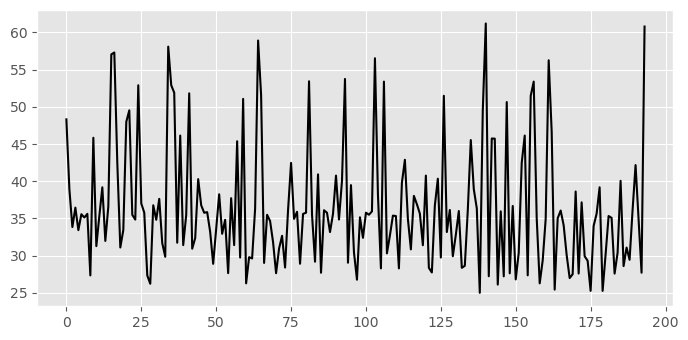

In [214]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(7, 3.5))

ax.plot(y_pred, color='k', label='Regression model')
#ax.scatter(x, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
#ax.set_ylabel('deathIncrease'),fontsize=14)
#ax.set_xlabel('PM2.5_Contn'), fontsize=14)
#ax.legend(facecolor='white', fontsize=11)
#ax.text(0.55, 0.15, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)

fig.tight_layout()